### Import the relevant libraries 

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import pandas as pd


%matplotlib inline


sns.set()

### Load the raw data

In [35]:
from sklearn.datasets import load_boston

data_raw = load_boston()

In [36]:
print(data_raw.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [37]:
print(data_raw.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [38]:
data = pd.DataFrame(data_raw.data, columns=data_raw.feature_names)
data['price'] = data_raw.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [39]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
dtype: object

In [40]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

### Preprocessing

#### Explore describtive statistic of variables

In [41]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Handle missing values

No missing values in dataset

#### EDA

In [2]:
sns.distplot(data['price'])



NameError: name 'sns' is not defined

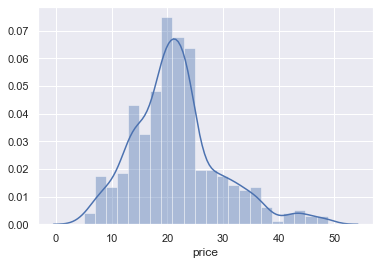

In [43]:
q = data['price'].quantile(0.99)
data = data[data['price'] < q]
sns.distplot(data['price'])

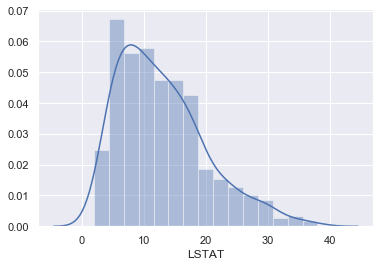

In [44]:
sns.distplot(data['LSTAT'])

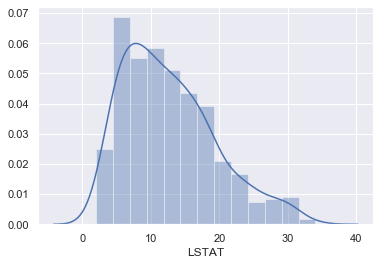

In [45]:
q = data['LSTAT'].quantile(0.99)
data = data[data['LSTAT'] < q]
sns.distplot(data['LSTAT'])

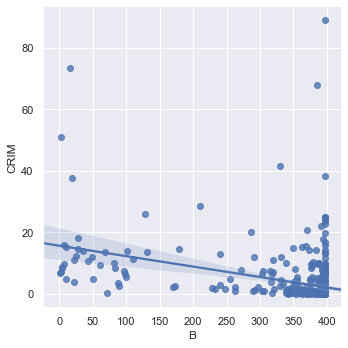

In [46]:
sns.lmplot(x='B',y='CRIM', data=data)

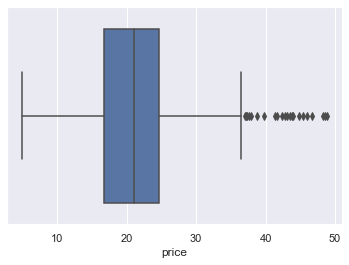

In [47]:
sns.boxplot(data['price'])

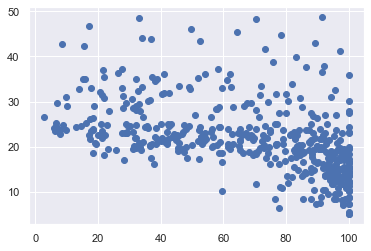

In [48]:
plt.scatter(data['AGE'],data['price'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

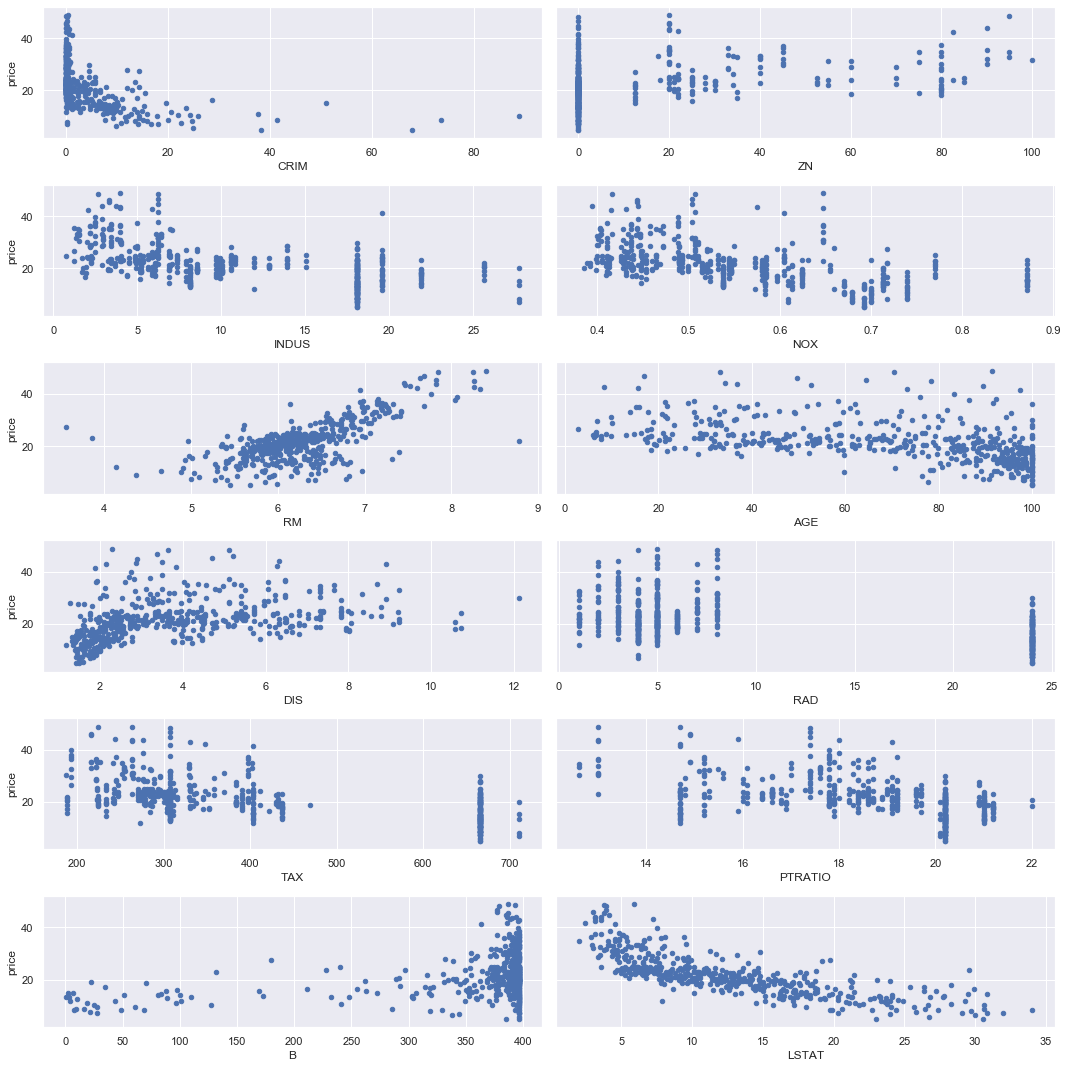

In [50]:
numeric_cols = [ 'CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']

fig, axes = plt.subplots(6, 2, figsize=(15,15), sharey=True)

for col, ax in zip(numeric_cols, axes.flatten()):
    data.plot(x=col, y = 'price', kind='scatter', ax=ax)

fig.tight_layout()

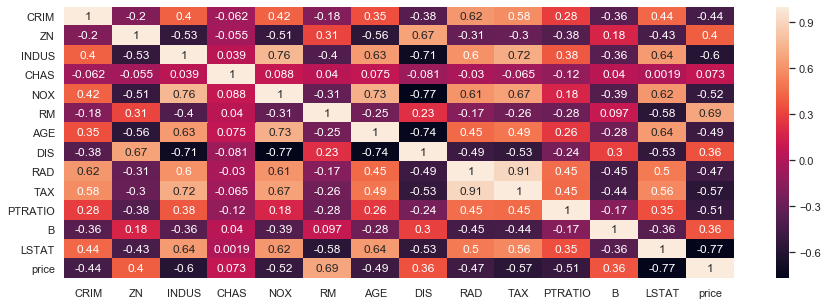

In [51]:
plt.figure(figsize=(15,5))

sns.heatmap(data.corr(), annot=True)

IndexError: index 8 is out of bounds for axis 0 with size 8

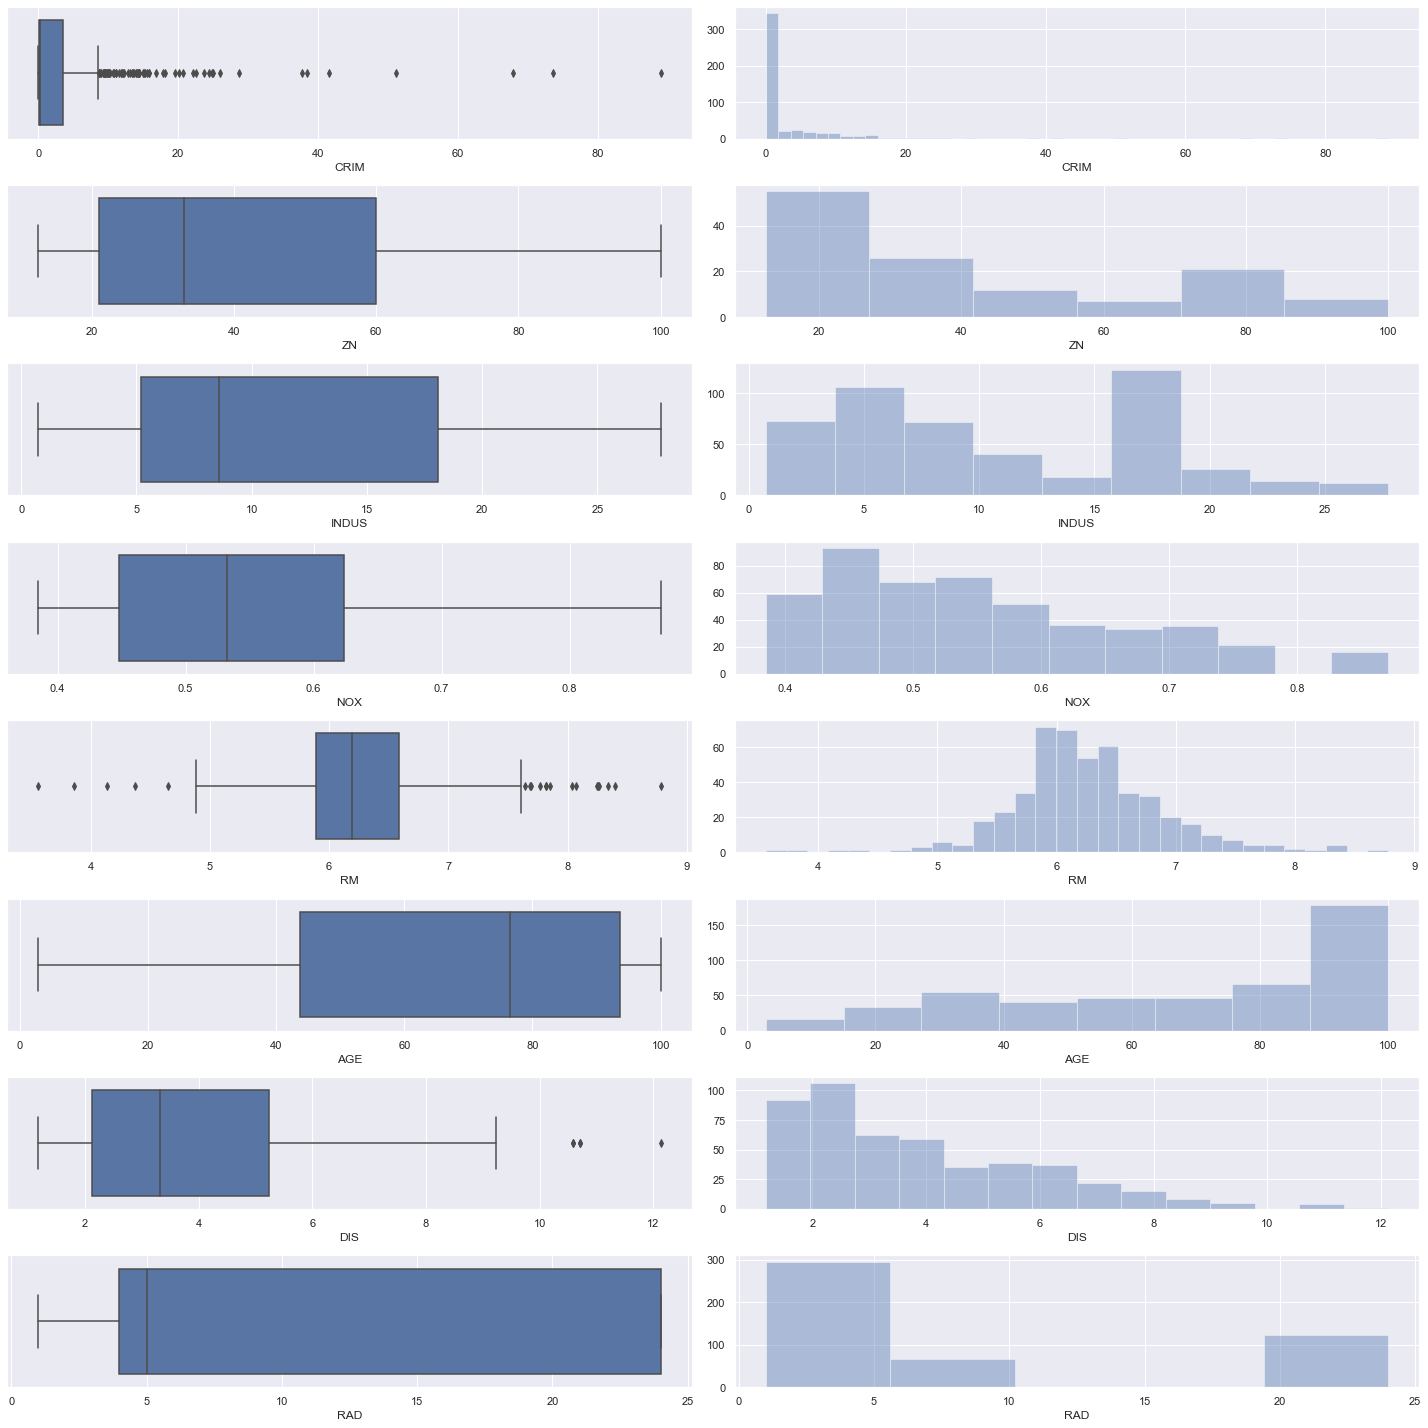

In [52]:
fig, axes = plt.subplots(8,2, figsize=(20,20))

for i, col in enumerate(numeric_cols):
    sns.boxplot(data[col].replace(0, pd.np.nan).dropna(), ax=axes[i,0])
    sns.distplot(data[col].replace(0, pd.np.nan).dropna(), kde=False, ax=axes[i,1])
    
    
    fig.tight_layout()

Price and RM are positively correlated

Price and LSTAT are negatively correlated

There is no sign of outliers in the data, some few houses priced above 50 have 7 rooms pluse 

Both LSTAT and RM are highly corrrrelated so we drop one of them as features

### Checking OLS assumptions

#### --------- Relaxing the assumptions

#### Linearity

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data['LSTAT'],data['price'])
ax1.set_title('Price and LSTAT')
ax2.scatter(data['RM'],data['price'])
ax2.set_title('Price and RM')
ax3.scatter(data['AGE'],data['price'])
ax3.set_title('Price and AGE')

 ----------------------------------------Dataset pass the normality test--------------------------------------------

#### No Endogeneity

#### Normality & Homoscedasticity

normality is assumped for a big sample following the central limit theorm
the zero mean of the distribution of errors is accomplished to the inclusion of the intercept in the regression

#### No Autocorrelation

The observation in the dataset are not coming from time series data or panel data 
They do not depend on each other

#### No Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[['CRIM', 'ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['feature'] = variables.columns

In [ ]:
vif

In [ ]:
vifs=vif[vif['VIF'] < 10]
vifs

VIF greater than 10 are highly correlated with the other variables

In [53]:
target1 = data['price']
inputs1 = data.drop(['price'],axis=1) 

In [54]:
import statsmodels.api as sm

x = sm.add_constant(inputs1)
results = sm.OLS(target1,inputs1).fit()

C:\Users\Box\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [29]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              1345.
Date:                Sat, 28 Mar 2020   Prob (F-statistic):                        0.00
Time:                        14:15:58   Log-Likelihood:                         -1328.4
No. Observations:                 485   AIC:                                      2683.
Df Residuals:                     472   BIC:                                      2737.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1046      0.027     -3.905      0.000      -0.157      -0.052
ZN             0.0309      0.011      2.707      0.007       0.008       0.053
INDUS         -0.0444      0.050     -0.881      0.379      -0.143       0.055
CHAS           0.5324      0.749      0.711      0.477      -0.939       2.004
NOX            1.6015      2.604      0.615      0.539      -3.515       6.718
RM             5.7614      0.254     22.671      0.000       5.262       6.261
AGE           -0.0283      0.011     -2.641      0.009      -0.049      -0.007
DIS           -0.7096      0.153     -4.646      0.000      -1.010      -0.409
RAD            0.1342      0.051      2.609      0.009       0.033       0.235
TAX           -0.0113      0.003     -3.751      0.000      -0.017      -0.005
PTRATIO       -0.3967      0.087     -4.540      0.000      -0.568      -0.225
B              0.0129      0.002      6.180      0.000       0.009       0.017
LSTAT         -0.3241      0.042     -7.652      0.000      -0.407      -0.241
==============================================================================
Omnibus:                      113.304   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              497.390
Skew:                           0.963   Prob(JB):                    9.84e-109
Kurtosis:                       7.572   Cond. No.                     8.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
target2 = data['price']
inputs2 = data.drop(['price','INDUS','CHAS','NOX'],axis=1)

x = sm.add_constant(inputs2)
results = sm.OLS(target2,inputs2).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              1755.
Date:                Sat, 28 Mar 2020   Prob (F-statistic):                        0.00
Time:                        15:10:32   Log-Likelihood:                         -1329.1
No. Observations:                 485   AIC:                                      2678.
Df Residuals:                     475   BIC:                                      2720.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1052      0.027     -3.949      0.000      -0.158      -0.053
ZN             0.0315      0.011      2.782      0.006       0.009       0.054
RM             5.8670      0.219     26.789      0.000       5.437       6.297
AGE           -0.0267      0.010     -2.595      0.010      -0.047      -0.006
DIS           -0.6919      0.144     -4.792      0.000      -0.976      -0.408
RAD            0.1463      0.049      2.964      0.003       0.049       0.243
TAX           -0.0122      0.003     -4.724      0.000      -0.017      -0.007
PTRATIO       -0.4121      0.086     -4.792      0.000      -0.581      -0.243
B              0.0132      0.002      6.358      0.000       0.009       0.017
LSTAT         -0.3213      0.040     -8.031      0.000      -0.400      -0.243
==============================================================================
Omnibus:                      116.003   Durbin-Watson:                   1.288
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              517.721
Skew:                           0.983   Prob(JB):                    3.79e-113
Kurtosis:                       7.665   Cond. No.                         736.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear regression model

#### Declare the inputs and target

In [90]:
target = data['price']
inputs = data.drop(['price'],axis=1) 

#### Scale the data

Standardize the features 

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [92]:
inputs = scaler.transform(inputs)

#### Train Test Split

In [93]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=101)

#### Training the Model

#### create the regression

In [94]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Checking the Model

Plot predicted values of the model against the targets

In [95]:
predictions = reg.predict(x_train)

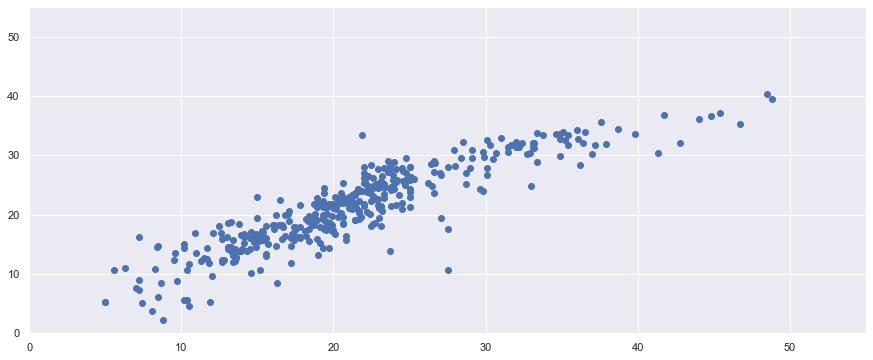

In [96]:
plt.figure(figsize=(15,6))
plt.scatter(y_train,predictions)
plt.xlim(0,55)
plt.ylim(0,55)
plt.show()

The residual plot to check the model

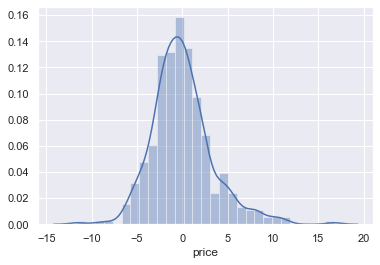

In [97]:
sns.distplot(y_train - predictions)

The model turns to overestimate the target since there is a longer tail on the positive side(right). a much higher 

price is predicted than is observed. On the left it is observeed that the model rarely underestimate the target 

#### Calcuting the R squred

In [98]:
reg.score(x_train,y_train)

0.8097217613996158

In [65]:
from sklearn import metrics

metrics.explained_variance_score(y_train,predictions)

0.8097217613996158

#### Finding the weights and bias

In [ ]:
reg.intercept_

In [ ]:
reg.coef_

In [ ]:
reg_summary = pd.DataFrame(data.drop(['price'],axis=1).columns.values, columns=['Features'])
reg_summary['weights'] = reg.coef_
reg_summary

A postive weight shows that as a feature increases in value, so do the price. e.g. RM

A negative weight shows that as a feature increases in value, price decreases e.g. CRIM

### Testing

In [66]:
predictions_test = reg.predict(x_test)

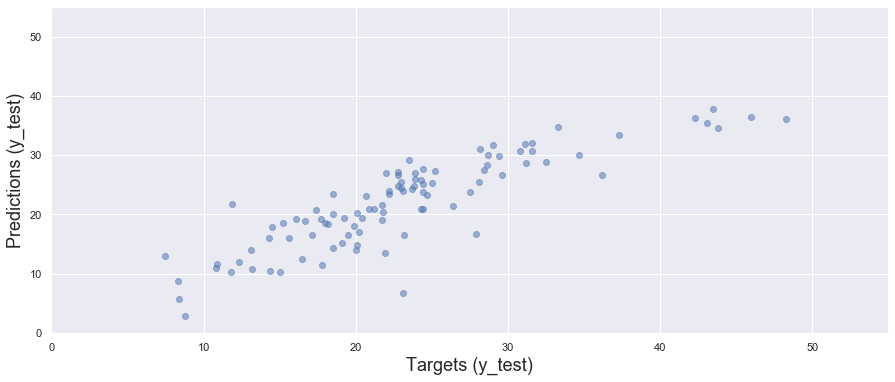

In [67]:
plt.figure(figsize=(15,6))
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_test)',size=18)
plt.scatter(y_test,predictions_test, alpha=0.5)
plt.xlim(0,55)
plt.ylim(0,55)
plt.show()

#### Evaluating the Model

Checking the performance of the model

In [68]:
performance = pd.DataFrame(predictions_test, columns=['Prediction'])
performance.head()

,Prediction
0,25.870542
1,20.126506
2,35.436546
3,17.806579
4,23.980385


In [69]:
performance['Targets'] = y_test
performance.head()

,Prediction,Targets
0,25.870542,NaN
1,20.126506,NaN
2,35.436546,34.7
3,17.806579,NaN
4,23.980385,NaN


In [70]:
y_test = y_test.reset_index(drop=True)
y_test

0     24.3
1     18.5
2     43.1
3     14.5
4     22.2
      ... 
92    26.4
93    22.8
94    23.0
95    31.6
96    27.9
Name: price, Length: 97, dtype: float64

In [71]:
performance['Targets'] = y_test
performance

,Prediction,Targets
0,25.870542,24.3
1,20.126506,18.5
2,35.436546,43.1
3,17.806579,14.5
4,23.980385,22.2
...,...,...
92,21.393647,26.4
93,26.724358,22.8
94,25.468371,23.0
95,32.050425,31.6


In [72]:
performance['Residual'] = performance['Targets'] - performance['Prediction']

In [73]:
performance['Difference%'] = np.absolute(performance['Residual']/performance['Targets'] *100)

In [74]:
performance

,Prediction,Targets,Residual,Difference%
0,25.870542,24.3,-1.570542,6.463137
1,20.126506,18.5,-1.626506,8.791926
2,35.436546,43.1,7.663454,17.780635
3,17.806579,14.5,-3.306579,22.803990
4,23.980385,22.2,-1.780385,8.019754
...,...,...,...,...
92,21.393647,26.4,5.006353,18.963458
93,26.724358,22.8,-3.924358,17.212096
94,25.468371,23.0,-2.468371,10.732049
95,32.050425,31.6,-0.450425,1.425396


In [75]:
performance.describe()

,Prediction,Targets,Residual,Difference%
count,97.000000,97.000000,97.000000,97.000000
mean,22.023089,23.140206,1.117117,14.949944
std,7.657560,8.414133,4.240835,15.553533
min,2.883103,7.500000,-9.870285,0.334444
25%,16.531282,18.000000,-1.570542,4.332575
50%,21.770285,22.800000,0.072574,10.732049
75%,27.195775,27.900000,3.679790,20.347786
max,37.696569,48.300000,16.296606,82.943569


In [76]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
performance.sort_values(by=['Difference%'])

,Prediction,Targets,Residual,Difference%
16,21.63,21.70,0.07,0.33
85,20.98,20.90,-0.08,0.39
29,30.67,30.80,0.13,0.41
48,20.27,20.10,-0.17,0.87
63,10.91,10.80,-0.11,0.98
54,28.29,28.60,0.31,1.07
41,20.97,21.20,0.23,1.11
13,25.29,25.00,-0.29,1.16
25,18.45,18.20,-0.25,1.38
95,32.05,31.60,-0.45,1.43


In [77]:
print('MAE', metrics.mean_absolute_error(y_test,predictions_test))
print('MSE', metrics.mean_squared_error(y_test,predictions_test))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,predictions_test)))

MAE 3.1844548293876387
MSE 19.04721941805284
RMSE 4.364312021161278


In [78]:
metrics.explained_variance_score(y_test,predictions_test)

0.7459706461426701

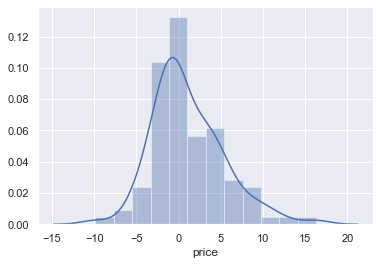

In [79]:
sns.distplot(y_test-predictions_test)

#### Create the coeffients table to answer the questions

In [ ]:
Question = pd.DataFrame(reg.coef_,data.drop(['price'],axis=1).columns.values)
Question

In [60]:
from sklearn.preprocessing import PolynomialFeatures

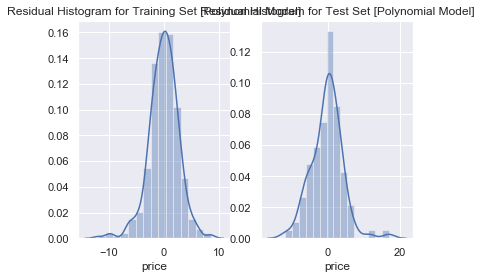

In [61]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=2)
   
# transform the features to higher degree features.
x_train_poly = poly_features.fit_transform(x_train)
   
# fit the transformed features to Linear Regression
poly_model = LinearRegression()

poly_model.fit(x_train_poly, y_train)
     
# predicting on training data-set
y_train_predicted = poly_model.predict(x_train_poly)
   
# predicting on test data-set
y_test_predicted = poly_model.predict(poly_features.fit_transform(x_test))



y_train_residual = y_train_predicted - y_train
y_test_residual = y_test_predicted - y_test

plt.subplot(1, 2, 1)
sns.distplot(y_train_residual, bins=15)
plt.title('Residual Histogram for Training Set [Polynomial Model]')

plt.subplot(1, 2, 2)
sns.distplot(y_test_residual, bins=15)
plt.title('Residual Histogram for Test Set [Polynomial Model]')

plt.show()

In [62]:
from sklearn import metrics

# evaluating the model on training data-set
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted))
r2_train = metrics.explained_variance_score(y_train, y_train_predicted)
     
print("The polynomial model performance for the training set")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))
print("\n")

print("-----------------------------------------------------------")

# evaluating the model on test data-set
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted))
r2_test = metrics.explained_variance_score(y_test, y_test_predicted)

print("The polynomial model performance for the test set")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))


The polynomial model performance for the training set
RMSE of training set is 2.6604804439096337
R2 score of training set is 0.8795650781553835


-----------------------------------------------------------
The polynomial model performance for the test set
RMSE of test set is 4.3188605745055915
R2 score of test set is 0.7350228381741523
